- 평가시 문제가 있을 때? 성능지표가 원하는대로 나오지 않았을 때 가장 많이 일어나는 상황중 하나가 과대적합 
- 이 문제를 해결하는 것들이 
- 어떻게 하면 오버피팅을 줄일것인가? 
- 제일 좋은건 일반화
- 과적합 --> 과대적합을 의믜
- 과소적합은 거의 안쓰임? 
- 피쳐들을 모델핏 해서 라벨을 추론할 때 , 학습을 하는데 학습데이터 (과거데이터) 우리가 예측하려고 하는 데이터는 아니죠. 지금까지 모아놨떤 데이터를 (알고있는 데이터)를 학습시키는 거죠. 지도학습이 답이 잇는 것을 학습시키는거죠. 알고있는 데이터를 학습시켜서 모델을 만들어서 새로운 데이터를, 앞으로 환자들에 대해서 분류를 하겠다는 것이죠. 
- 일반화는 결국 새 데이터(추론할, 미래데이터)를 잘 맞출수 있는 모델을 일반화된 모델이라고 한다. 
- 문제는, 기존 데이터들만 잘 맞는 것이 아니라 새로운 데이터도 잘 맞아야 하는 것이다. 
- 내가 가지고 잇는 데이터 수는 한정적이다. 그래서 트레인과 테스트 데이터를 나눠서 적용해보고 잘 맞출수 있을 지에 대해서 평가 하는것. 
- 트레인 <- 모델 학습 
- 테스트 <- 평가 지표 
- 트레인은 잘 나오는데, 테스트는 잘 나오지 않는 경우 ==> 오버피팅 
- 우리가 목적한 지표가 0.9인데,, 0.8나왔다. 하면 성능을 끌어올릴수 있는 여지가 필요하다. 
- 끌어올릴수 있는 원인이 무엇인지 파악해보자. 

# 6.1 과대적합(Overfitting)

- 일반화 (Generalization) 
    - 모델이 새로운 데이터셋(테스트 데이터)에 대하여 정확히 예측하면 이것을 (훈련데이터에서 테스트데이터로) 일반화 되었다고 말한다. 
    - 모델이 훈련 데이터로 평가한 결과와 테스트 데이터로 평가한 결과의 차이가 거의 없고 좋은 평가지표를 보여준다.
    
    
- 과대적합 (Overfitting)
    - 모델이 훈련 데이터에 대한 예측성능은 너무 좋지만 일반성이 떨어져 새로운 데이터(테스트 데이터)에 대해선 성능이 좋지 않은 것을 Overfitting이라고 한다. 
    - 이는 모델이 훈련 데이터 세트의 특징을 너무 맞춰서 학습 되었기 때문에 일반화 되지 않아 새로운 데이터셋(테스트세트)에 대한 예측 성능이 떨어져 발생한다.
        
        
        
- 과소적합 (Underfitting)
    - 모델이 훈련 데이터과 테스트 데이터셋 모두에서 성능이 안좋은 것을 말한다.
    - 모델이 너무 간단하여 훈련 데이터에 대해 충분히 학습하지 못해 데이터셋의 패턴들을 다 찾아내지 못해서 발생한다.
    
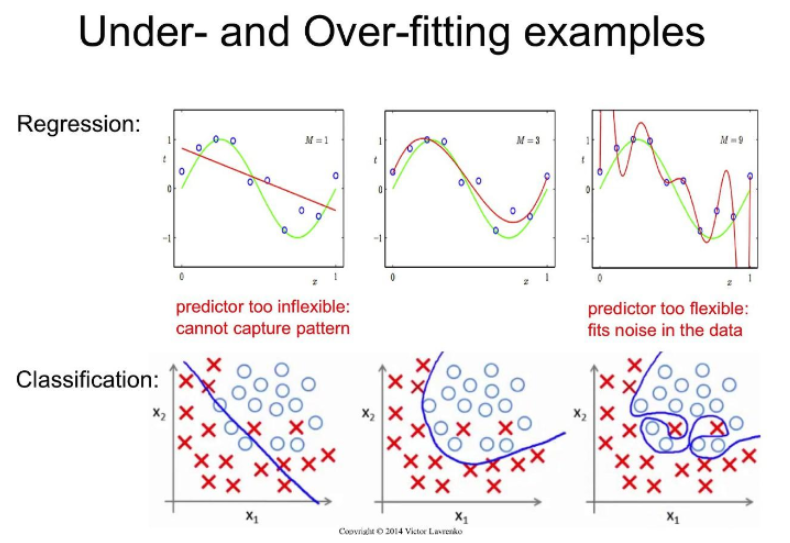

### 6.1.1 Overfitting(과대적합)의 원인
- 1.모델이 너무 복잡한 경우
    - Overfitting을 줄이기 위한 규제 하이퍼파라미터 설정한다.
    - Feature 개수 줄인다.
    
    
- 2.데이터의 문제
    - 데이터 전처리를 통해 질 좋은 데이터를 만든다.
    - 데이터를 더 수집한다. 
        - 현실적으로 어려운 경우가 많다.(비용과 시간의 문제)

### 6.1.2 연습 cancer

Train accuracy : 1.0
Test  accuracy : 0.9300699300699301


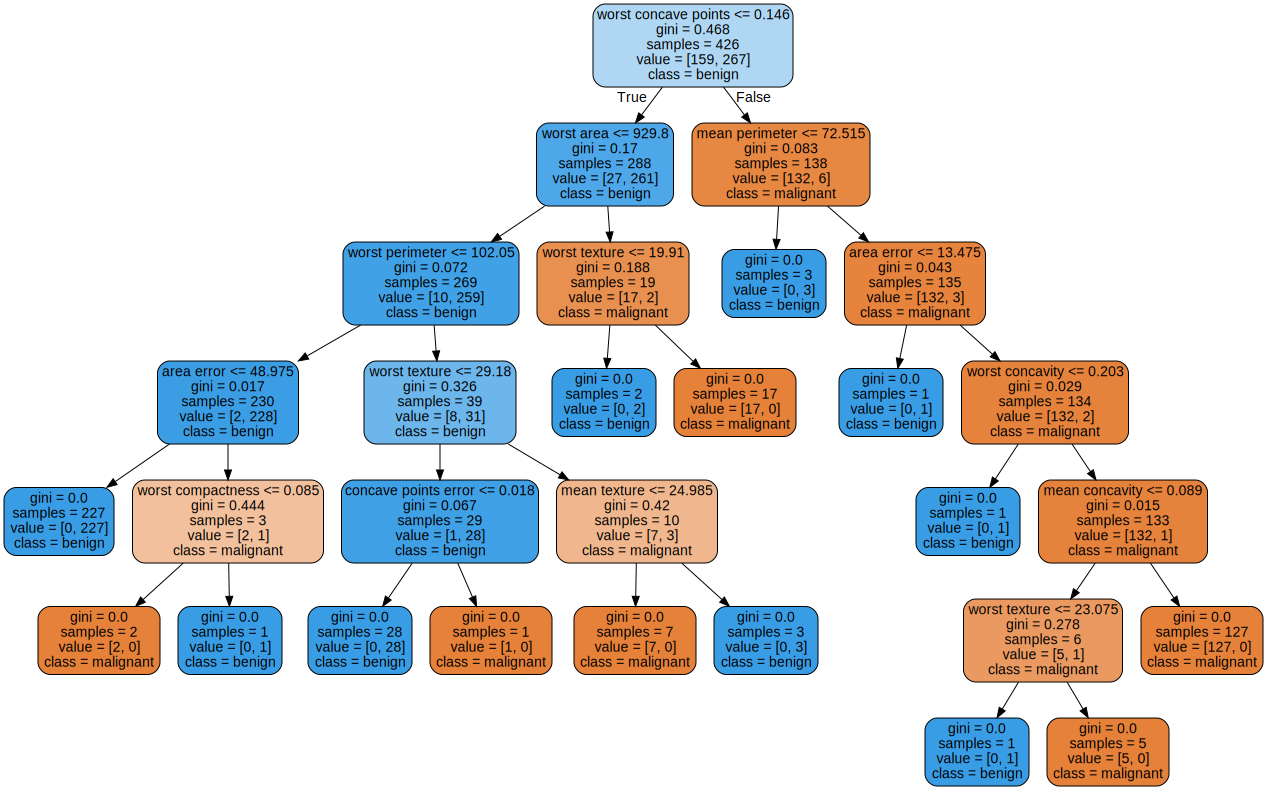

In [5]:
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import numpy as np
from sklearn.tree import export_graphviz
from graphviz import Source

# 1. dataload
cancer = load_breast_cancer()
X = cancer['data']
y = cancer['target']

# 2. split
X_train,X_test, y_train,y_test = train_test_split(X, y, stratify=y, random_state=1)

# 3. model fit
tree = DecisionTreeClassifier(random_state=1)
tree.fit(X_train, y_train)

# 4. predict 추론 
pred_train = tree.predict(X_train)
pred_test = tree.predict(X_test)

# 5. 정확도 - max depth를 주지 않았을 경우 
# train > test : 과적합, test 점수가 목표한 것 만큼 나왔니? 
print('Train accuracy :', accuracy_score(y_train, pred_train))
print('Test  accuracy :', accuracy_score(y_test, pred_test))

# y_train이 무엇으로 구성되어있는지 : 0, 1 로 분류
# 0 - 159개, 1- 267개 
np.unique(y_train, return_counts = True) 

# 6. 그래피즈 
graph = Source(export_graphviz(tree, #학습한 모델
                               out_file = None, #이미지로 저장할때 파일경로
                               feature_names = cancer['feature_names'], #Feature(컬럼)의 이름
                               class_names = cancer['target_names'], # Label의 class 이름
                               rounded = True, # 도형 동그랗게 표현 
                               filled = True # 색 칠해줌 : 0(주황), 1(파랑) --> 농도는 갯수
))
graph

In [6]:
X_train

array([[9.436e+00, 1.832e+01, 5.982e+01, ..., 5.052e-02, 2.454e-01,
        8.136e-02],
       [1.205e+01, 1.463e+01, 7.804e+01, ..., 6.548e-02, 2.747e-01,
        8.301e-02],
       [1.288e+01, 1.822e+01, 8.445e+01, ..., 1.096e-01, 2.582e-01,
        8.893e-02],
       ...,
       [1.754e+01, 1.932e+01, 1.151e+02, ..., 1.939e-01, 2.928e-01,
        7.867e-02],
       [1.270e+01, 1.217e+01, 8.088e+01, ..., 8.224e-02, 2.775e-01,
        9.464e-02],
       [1.919e+01, 1.594e+01, 1.263e+02, ..., 1.777e-01, 2.443e-01,
        6.251e-02]])

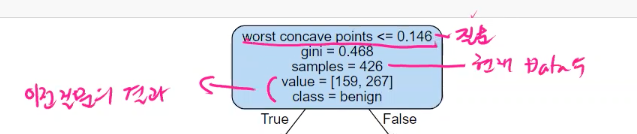

1. 그래프 설명 
    - 맨 윗줄 : 질문 
    - gini : 복잡도 , 클래스 별로 얼마나 섞여 있는지 
        - 0 ~ 0.5 : 0.5로 갈수록 복잡해 진다. 
    - samples : 현재데이터 수 
    - 밑에 2줄 : 이전 질문의 결과 

======== 
1. sample  = 426 --> 총샘플의 수가 426개가 있다. 
    - y_train.size = 426 
    
    
2. value = [159, 267] 
    - np.unique(y_train, return_counts = True) 
    - 0이 159개, 1이 267개 
    - 많은게 1이기 때문에 그 클래스가 benign을 가르킨다. 
    - cancer['target_names] 에서 0은 malignant, 1은 benign 
    
    
3. 질문 : 이 컬럼(??) 의 값이  0.146보다 작거나 같니? 
    - 컬럼의 값을 지정했기 때문에 나옴 , feature_names = cancer['feature_names'] 
    - 지정하지 않았으면 X[27] 이런식으로 인덱스로 나옴 
    
    
4. 질문에 답은 그 다음 gini, samples, valuees, class로 답한다. 



=======

나눴는데 완벽히 나눠지지 않았다. 그래서 또 질문을 한다.  
복잡도가 낮아지도록 나눠진다.     
value = [0,3] <-- 나눠질게 없으니 끝. 
0개가 나오면 나눠질게 없으니 끝. 완벽히 분리.      


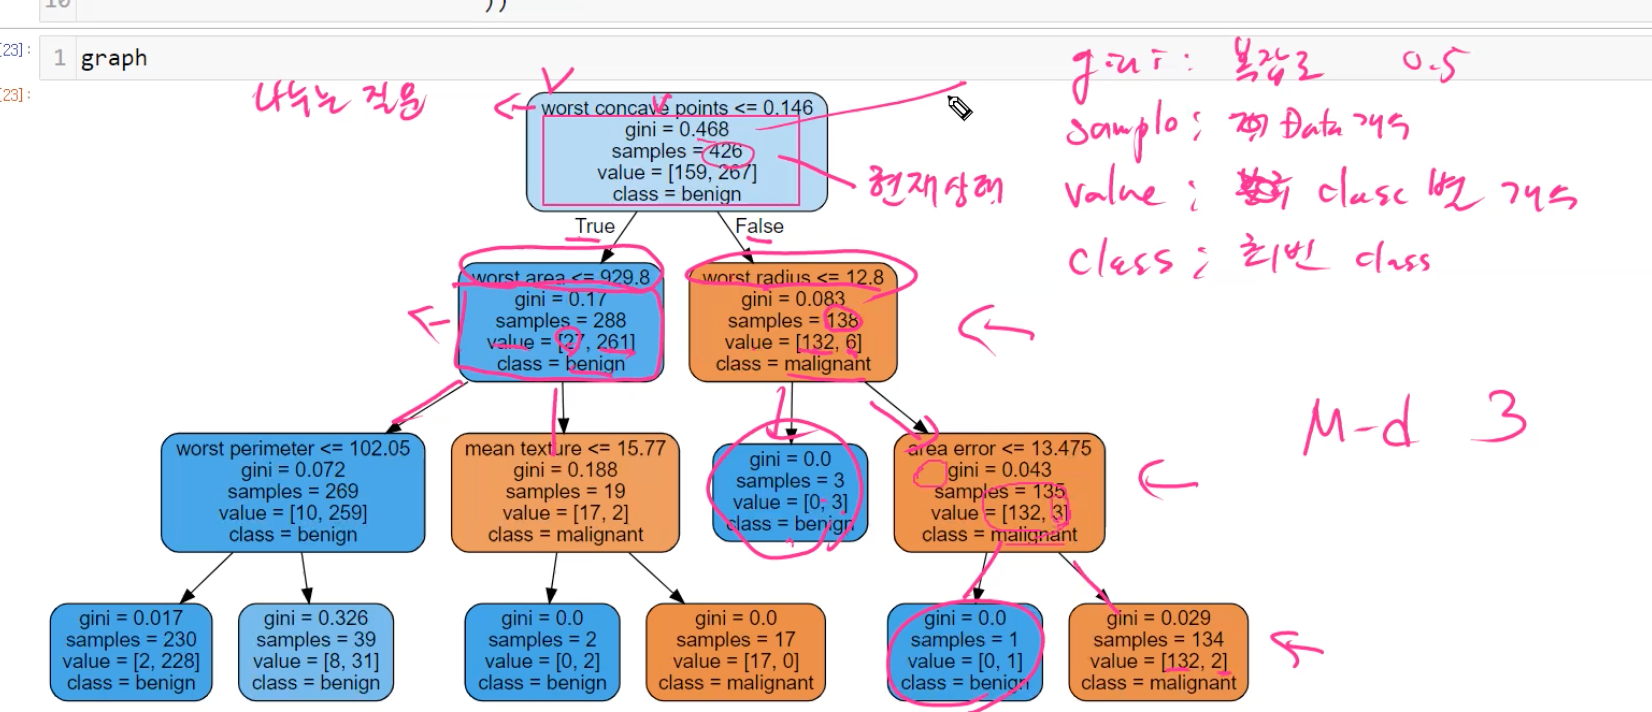

- 여기까지 오면 0일 가능성높다. 
- 그러나 3개의 기준때문에 분할해서 내려가니 1로 예측되었다.
- 잘못예측한 셈이다. ==> 학습을 너무 너무 많이 오버했다. 과적합. 
- 이럴때 어떻게 해줘야할까? 
- 더이상 나누지마 ==> 규제 하이퍼 파라미터를 설정해주자. 
- 학습할때 max_depth를 정해서 제한한다. 


Train정확도: 1.0
Test정확도: 0.9300699300699301


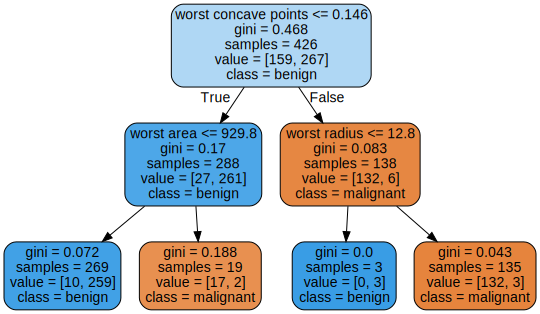

In [7]:
# 정확도 - max_depth = 2
# 3. model fit
tree = DecisionTreeClassifier(max_depth = 2 , random_state=1)
tree.fit(X_train, y_train)

print('Train정확도:', accuracy_score(y_train, pred_train))
print('Test정확도:', accuracy_score(y_test, pred_test)) # 테스트 정확도는 조금 올랐다. 

graph = Source(export_graphviz(tree, #학습한 모델
                               out_file = None, #이미지로 저장할때 파일경로
                               feature_names = cancer['feature_names'], #Feature(컬럼)의 이름
                               class_names = cancer['target_names'], # Label의 class 이름
                               rounded = True, # 도형 동그랗게 표현 
                               filled = True # 색 칠해줌 : 0(주황), 1(파랑) --> 농도는 갯수
))
graph # 완벽히 나눠지진 않았지만 예측을 끝냈다. 

# =======50일차 수업 시작 =======

## Decision Tree 복잡도 제어(규제)
- Decision Tree 모델을 복잡하게 하는 것은 노드가 너무 많이 만들어 지는 것이다. 
    - 노드가 많이 만들어 질수록 훈련데이터셋에 과대적합된다.
- 적절한 시점에 트리 생성을 중단해야 한다.
- 규제 하이퍼파라미터
    - max_depth: 트리의 최대 깊이를 제한.
    - max_leaf_nodes: Leaf Node의 최대개수를 제한
    - min_sample_leaf: leaf node가 되기 위한 sample 수지정.

$질문$
- 뎁스, 리브노드, 샘플리브 --> 규제할때 어떤 상황일때 제한을 하면 좋을까?
- 주로 많이 쓰는게 맥스뎁스 -> 민샘플리브 순으로 규제한다심 


In [8]:
# DecisionTreeClassifier?

# GridSearch (그리드 서치)
## 적당한 max_depth 찾기

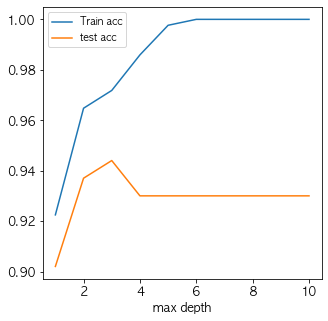

In [14]:
# 방법 1) 반복문 돌려보기 
import pandas as pd 
import matplotlib.pyplot as plt


depth_list = range(1,11) # max_depth 후보(1~10)

# 각각의 depth_list에 따른 max_depth결과를 저장할 정확도리스트 
train_acc_list = []
test_acc_list = []

for depth in depth_list :
    tree = DecisionTreeClassifier(max_depth = depth, random_state=1)
    tree.fit(X_train, y_train)
    
    pred_train = tree.predict(X_train)
    pred_test = tree.predict(X_test)
    
    train_acc_list.append(accuracy_score(y_train, pred_train))
    test_acc_list.append(accuracy_score(y_test, pred_test))
    
result = pd.DataFrame(dict(
    max_depth = depth_list,
    Train = train_acc_list,
    Test = test_acc_list
))

result 

plt.figure(figsize = (5,5))
plt.plot(depth_list, train_acc_list, label = 'Train acc')
plt.plot(depth_list, test_acc_list, label = 'test acc')
plt.xlabel('max depth')
plt.legend()
plt.show()

%필기%
- 맥스뎁스가 0으로 갈수록 단순한 모델, 값이 커질수록 복잡한 모델 
- 트레인 같은 경우는 모델의 복잡할 수록 증가하고 어느정도 되면 유지가 된다. 
- 테스트 같은 경우는 어느시점 가면 떨어지게 된다. 아니면 유지 그래도 결국 떨어지게 된다. 
- 저기 떨어지는 지점을 우리가 선택해야하는 지점이다. 

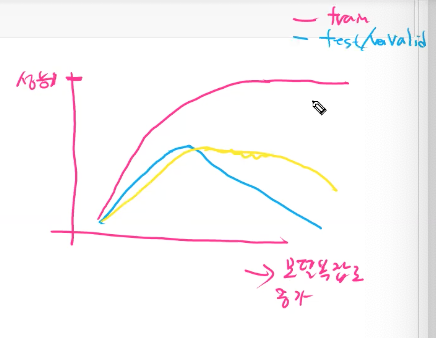


- 우리가 저 지점을 찾아야 한다. 어떻게 찾으면 좋을까? 
- 포문으로 구하게 되면? 경우의 수도 너무 많이 나오고 시간도 많이 걸리게 된다. 
- 복잡하지만 포문을 돌릴수 있다는 라는 것은 공통된 작업을 하는것이다.
- 공통된 작업을 한다라는 것은 라이브러리가 있다라는 것. 
- 후보들의 조합을 다 보는 것 , 어떤 조합일때 최적의 경우인가? == > 그리드 서치(격자)이다.
- 반복문들 돌리지 않고 그리드서치 라이브러리를 통해 찾아보자. 

## Grid Search 를 이용한 하이퍼파라미터 튜닝
- 하이퍼 파라미터 (Hyper Parameter)
    - 머신러닝 모델을 생성할 때 사용자가 직접 설정하는 값
    - 머신러닝 모델에 따라 다르기는 하지만 많은 하이퍼파라미터들을 변경할 수 있다.
- 하이퍼 파라미터 튜닝
    - 하이퍼 파라미터의 설정에 따라 모델의 성능이 달라진다.

## 최적의 하이퍼파라미터 찾기
1. 만족할 만한 하이퍼파라미터들의 값의 조합을 찾을 때 까지 일일이 수동으로 조정
2. GridSearch 사용
    - GridSearchCV()
        - 시도해볼 하이퍼파라미터들을 지정하면 모든 조합에 대해 교차검증 후 제일 좋은 성능을 내는 하이퍼파라미터 조합을 찾아준다.
        - 적은 수의 조합의 경우는 괜찮지만 시도할 하이퍼파라미터와 값들이 많아지면 너무 많은 시간이 걸린다.
3. Random Search 사용    
    - RandomizedSearchCV()
        - GridSeach와 동일한 방식으로 사용한다.
        - 모든 조합을 다 시도하지 않고 각 반복마다 임의의 값만 대입해 지정한 횟수만큼만 평가한다.

###  ??1. GridSearchCV 매개변수및 결과조회
- 주요 매개변수
    - estimator: 모델객체 지정
    - params : 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - scoring: 평가 지표
    - cv : 교차검증시 fold 개수. 
    - n_jobs : 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)
- 메소드
    - fit(X, y) : 학습
    - predict(X): 제일 좋은 성능을 낸 모델로 predict()
    - predict_proba(X): 제일 좋은 성능을 낸 모델로 predict_proba() 호출
- 결과 조회 변수
    - cv_results_ : 파라미터 조합별 결과 조회
    - best_params_ : 가장 좋은 성능을 낸 parameter 조합 조회
    - best_estimator_ : 가장 좋은 성능을 낸 모델 반환
        

In [64]:
# 예제 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

X, y = load_breast_cancer(return_X_y = True)
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=1)

# model
tree = DecisionTreeClassifier()

# 하이퍼파라미터 후보들을 딕셔너리로 지정한다. 파라미터 이름 : [후보] 리스트로 묶어서
param_grid = {
    'max_depth' : range(1,11),
    'max_leaf_nodes' : [3, 5, 7, 9], 
    'random_state' : [1] # 한개를 넣어도 리스트로 넣어준다. 
}

grid_search = GridSearchCV(
    tree, # 학습시킬 모델 
    param_grid = param_grid, # 하이퍼파라미터 후보 설정
#     scoring = 'accuracy', # 평가지표 1개 설정
    scoring = ['accuracy', 'recall', 'precision'], # 평가지표 여러개 설정 시 -> refit도 설정해야함
    refit = 'accuracy', # 평가지표가 여러개 일때 어떤 지표를 기준으로 best_esimator를 만들 것인지 설정
    cv = 5, # 교차검증(cross validation)의 폴더 갯수 (몇개로 나눌 것인지) 5개 중 하나는 val
    n_jobs = -1 # cpu 다 써라 
) # 10(max_depth) * 4(max_leaf_node) * 1(random_state) * 5(cv) = 200 번 돈다. 

# 학습 - 최적의 하이퍼파라미터 조합 찾기 
grid_search.fit(X_train, y_train)

# 검증 
pred_train = grid_search.predict(X_train) # 가장 성능이 잘 나온 하이퍼파라미터를 가진 트리모델로 예측 
print('- grid_search accuracy score :',accuracy_score(y_train, pred_train))

# 어떤게 최적의 하이퍼파라미터 인지 결과 확인 하기 : cv_results_ 
# 1) scorging 1개 일때 
df = pd.DataFrame(grid_search.cv_results_)#.sort_values('rank_test_score').head(3) # scoring 1개 

# 2) scroing 여러개 일 때 
df[['mean_test_accuracy', 'rank_test_accuracy', 
    'mean_test_recall', 'rank_test_recall', 
    'mean_test_precision', 'rank_test_precision']]
df.sort_values('rank_test_precision')

# 확인해보자. 진짜 최적의 하이퍼파라미터일때 검증 결과와 accruacy결과가 같은지  ? yes 
best_param = grid_search.best_params_
print('- grid_search best_param :', best_param)
best_estimator = grid_search.best_estimator_
type(best_estimator)
print('- grid_search best_estimator :', best_estimator)

pred_train = best_estimator.predict(X_train)
print('- train accuracy_score :',accuracy_score(y_train, pred_train))

pred_test = best_estimator.predict(X_test)
print('- test  accuracy_score :',accuracy_score(y_test, pred_test))


- grid_search accuracy score : 0.9577464788732394
- grid_search best_param : {'max_depth': 2, 'max_leaf_nodes': 3, 'random_state': 1}
- grid_search best_estimator : DecisionTreeClassifier(max_depth=2, max_leaf_nodes=3, random_state=1)
- train accuracy_score : 0.9577464788732394
- test  accuracy_score : 0.9300699300699301


% 필기 % 
- 그리드서치의 한계 : 하이퍼파라미터 지정할때 내가 지정한 값에 대한 것만 검증을 하는 부분 
- 

### ?.?.2? RandomizedSearchCV
- 주요 매개변수
    - estimator: 모델객체 지정
    - **param_distributions** : 하이퍼파라미터 목록을 dictionary로 전달 '파라미터명':[파라미터값 list] 형식
    - **n_iter** : 파라미터 검색 횟수
    - scoring: 평가 지표
    - cv : 교차검증시 fold 개수. 
    - n_jobs : 사용할 CPU 코어 개수 (None:1(기본값), -1: 모든 코어 다 사용)
- 메소드
    - fit(X, y) : 학습
    - predict(X): 제일 좋은 성능을 낸 모델로 predict()
    - predict_proba(X): 제일 좋은 성능을 낸 모델로 predict_proba() 호출
- 결과 조회 변수
    - cv_results_ : 파라미터 조합별 결과 조회
    - best_params_ : 가장 좋은 성능을 낸 parameter 조합 조회
    - best_estimator_ : 가장 좋은 성능을 낸 모델 반환

In [58]:
# 랜덤마이즈 서츠 씨븨 
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import RandomizedSearchCV

tree = DecisionTreeClassifier()
param_grid = {
    'max_depth' : range(1, 21),
    'max_leaf_nodes' : range(2, 11),
    'criterion' : ['gini', 'entropy'], # 
    'random_state' : [1]
}
n_iter = 50 # 확인할 조합의 갯수, default : 10 
randomized_search = RandomizedSearchCV(
    tree,
    param_distributions=param_grid,
    n_iter=n_iter,
    scoring = 'accuracy',
    cv = 3,
    n_jobs=-1
)
randomized_search.fit(X_train, y_train)

df = pd.DataFrame(randomized_search.cv_results_)
# df.shape
df.sort_values('rank_test_score')

print('- randomized_search_best_param     :', randomized_search.best_params_)
print('- randomized_search_best_estimator :',randomized_search.best_estimator_)

- randomized_search_best_param     : {'random_state': 1, 'max_leaf_nodes': 5, 'max_depth': 11, 'criterion': 'gini'}
- randomized_search_best_estimator : DecisionTreeClassifier(max_depth=11, max_leaf_nodes=5, random_state=1)


$필기$
- 해야할게 많고 값들의 범위가 듬성듬성 일때 , 랜덤마이즈서치 해서 대략적으로 어느정도 값에 베스트인지 확인하고 -> 그리드서치로 확인하는 형태? 

# > - 유틸리티 
# 파이프라인 (Pipeline)
- 개요
    - 여러 단계의 머신러닝 프로세스 (전처리의 각 단계, 모델생성, 학습) 처리 과정을 설정하여 한번에 처리되도록 한다.
- 파이프라인은 여러개의 변환기와 마지막에 변환기 또는 추정기를 넣을 수 있다. (추정기-Estimator는 마지막에 만 올 수 있다.)
- 전처리 작업 파이프라인
    - 변환기들로만 구성
- 전체 프로세스 파이프 라인
    - 마지막에 추정기를 넣는다
    
### Pipeline 생성
- (이름, 변환기) 를 리스트로 묶어서 전달한다.
- 마지막에는 추정기가 올 수있다.

### Pipeline 을 이용한 학습
- pipeline.fit() 
    - 각 순서대로 각 변환기의 fit_transform()이 실행되고 결과가 다음 단계로 전달된다. 마지막 단계에서는 fit()만 호출한다.
    - 보통 마지막이 추정기일때 사용
- pipeline.fit_transform()
    - fit()과 동일하나 마지막 단계에서도 fit_transform()이 실행된다.
    - 보통 전처리 작업 파이프라인(모든 단계가 변환기)일 때  사용

In [71]:
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

order = [
    ("scaler", StandardScaler()), # 1번째 작업
    ("svc", SVC())# 2번째 작업
]
pipeline = Pipeline(order, verbose=True) #verbose=True: 학습시 로그를 출력
print(pipeline.steps)

# 학습 : 파이프라인을 학습 
pipeline.fit(X_train, y_train) 

pred_train = pipeline.predict(X_train)
pred_test = pipeline.predict(X_test)

print('- train accuracy : ',accuracy_score(y_train, pred_train))
print('- test  accuracy : ',accuracy_score(y_test, pred_test))

[('scaler', StandardScaler()), ('svc', SVC())]
[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s
- train accuracy :  0.9882629107981221
- test  accuracy :  0.9790209790209791


# ===> 여기서 부터 복습 다시 해야하미 

## GridSearch에서 Pipeline 사용
- 하이퍼파라미터 지정시 파이프라인 `프로세스이름__하이퍼파라미터` 형식으로 지정한다.


In [72]:
#SVC : C, gamma
param_grid = {
    "svc__C":[0.001, 0.01, 0, 1, 10, 100],
    "svc__gamma":[0.001, 0.01, 0, 1, 10, 100]
}
grid_search = GridSearchCV(pipeline,  #모델에 pipeline 객체 지정
                           param_grid=param_grid,
                           scoring='accuracy', 
                           cv=3, 
                           n_jobs=-1)

grid_search.fit(X_train, y_train)

pd.DataFrame(grid_search.cv_results_).sort_values('rank_test_score')

grid_search.best_params_

pred_train = grid_search.predict(X_train)
pred_test = grid_search.predict(X_test)

accuracy_score(y_train, pred_train), accuracy_score(y_test, pred_test)



[Pipeline] ............ (step 1 of 2) Processing scaler, total=   0.0s
[Pipeline] ............... (step 2 of 2) Processing svc, total=   0.0s


/opt/anaconda3/lib/python3.8/site-packages/sklearn/model_selection/_search.py:918: UserWarning: One or more of the test scores are non-finite: [0.62676056 0.62676056 0.62676056 0.62676056 0.62676056 0.62676056
 0.62676056 0.62676056 0.62676056 0.62676056 0.62676056 0.62676056
        nan        nan        nan        nan        nan        nan
 0.94131455 0.96713615 0.62676056 0.62676056 0.62676056 0.62676056
 0.96713615 0.98356808 0.62676056 0.6314554  0.62676056 0.62676056
 0.98122066 0.97652582 0.62676056 0.6314554  0.62676056 0.62676056]
  warnings.warn(


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svc', SVC())],
                                verbose=True),
             n_jobs=-1,
             param_grid={'svc__C': [0.001, 0.01, 0, 1, 10, 100],
                         'svc__gamma': [0.001, 0.01, 0, 1, 10, 100]},
             scoring='accuracy')

## make_pipeline() 함수를 이용한 파이프라인 생성을 편리하게 하기

In [ ]:
from sklearn.pipeline import make_pipeline

pipeline2 = make_pipeline(StandardScaler(), SVC())
pipeline2.steps

pipeline2.fit(X_train, y_train)

accuracy_score(y_test, pipeline2.predict(X_test))